# CALCULO INTEGRAL E DIFERENCIAL#

Julia é uma importante ferramenta matemática na resolução de vários problemas em diversos campos das ciências. Aqui neste tutorial, será utilizado 3 pacotes para cálculo diferencial e integral:

* **SymPy**

O pacote SymPy é uma biblioteca Python para matemática simbólica no qual podemos ter acesso via pacote PyCall de julia. SymPy fornece uma interface para cálculo diferencial (definido e indefinido) e integral (definido e indefinido).

* **Calculus**

O pacote de Calculus fornece várias ferramentas para trabalhar com as operações de cálculo básicos de diferenciação e integração. Permite calcular derivadas aproximadas por várias técnicas de diferenciação finita ou calcular a derivada exata usando diferenciação simbólica sem o uso do SymPy.

* **Cubature**

Este pacote fornece rotinas de integração adaptativas Uni e multi-dimensionais para a linguagem de Julia,com base no pacote Cubature escrito por Steven G. Johnson para C

##LIMITES DE UMA FUNÇÃO

+ ####LIMITE SIMBÓLICO BÁSICO

In [38]:
using SymPy

@syms x,y

(x,y)

In [39]:
SymPy.limit((x-1)^2 / (x-1), x,1 ) 

0

Ou ainda

In [40]:
fx = (x-1)^2 / (x-1)

x - 1

In [41]:
SymPy.limit(fx, x,1 ) 

0

** Limite função duas variáveis**

In [42]:
fxy = x*y-2*x+y

x⋅y - 2⋅x + y

In [43]:
SymPy.limit(limit(fxy,x,1),y,1)

0

+ #### LIMITE SIMBÓLICO INFINITO####

In [44]:
SymPy.limit(1/x^2,x,oo)

0

In [45]:
SymPy.limit(1/x^2,x,0)

∞

+ #### LIMITE NUMÉRICO

SymPy não define um comando para calcular o limite numérico

In [46]:
using SymPy
@syms x

(x,)

In [47]:
fln = (x-1)^2/(x+1)

fln(x)

       2
(x - 1) 
────────
 x + 1  

In [48]:
# Limite pela direita
# ATENÇÃO ao detalhe: 10.0 é float e 10 é inteiro.

x = 10.0^-15

fln(x)

0.999999999999997

** Forma visual do limite x -> 0**

In [49]:
xln = [10.0^(-i) for i in 1:10]

yln = [fln(var)  for var in xln]

[xln yln]

10x2 Array{Any,2}:
 0.1      0.736363636363636
 0.01     0.970396039603960
 0.001    0.997003996003996
 0.0001   0.999700039996000
 1.0e-5   0.999970000399996
 1.0e-6   0.999997000004000
 1.0e-7   0.999999700000040
 1.0e-8   0.999999970000000
 1.0e-9   0.999999997000000
 1.0e-10  0.999999999700000

## DERIVADA DE UMA FUNÇÃO##

+ ### DERIVADA SIMBÓLICA INDEFINIDA###

In [50]:
using SymPy

@vars x

(x,)

In [51]:
fx = x^2 + 3*x

 2      
x  + 3⋅x

In [52]:
# Primeira derivada

diff(fx,x,1)

2⋅x + 3

outra forma legal

In [53]:
der1 = SymPy.Derivative(fx,x,1)

d ⎛ 2      ⎞
──⎝x  + 3⋅x⎠
dx          

In [54]:
doit(der1)

2⋅x + 3

In [55]:
# Segunda derivada

diff(fx,x,2)

2

outra forma legal

In [56]:
der2 = Derivative(fx,x,2)

  2          
 d ⎛ 2      ⎞
───⎝x  + 3⋅x⎠
  2          
dx           

In [57]:
doit(der2)

2

In [58]:
# Terceira derivada

diff(fx,x,3)

0

** Derivação sem usar o pacote SymPy**

Algumas vezes o SymPy pode dar problemas com alguma função, então a saída é usar o Calculus. Sintaxe:
```julia
differentiate("expressão",:variavel)
```
* **expressão**: expressão de uma variável ou mais variáveis
* **variavel**: variável ou variáveis

In [59]:
using Calculus

In [60]:
differentiate("x^2 + 3*x",:x)

:(3 + 2x)

In [61]:
differentiate("x^2 - y", [:x, :y])

2-element Array{Any,1}:
   :(2x)
 -1     

+ ### DERIVADA SIMBÓLICA DEFINIDA ###

In [62]:
using SymPy

@vars x

(x,)

In [63]:
fx = x^3 + 3*x

fx(x)

 3      
x  + 3⋅x

In [64]:
# primeira derivada x = 0

diff(fx,x,1)(0)

3

In [65]:
# segunda derivada x = 0

diff(fx,x,2)(0)

0

Atribuíndo a derivada a uma variável

In [66]:
# primeira derivada x = 0

dy1 = diff(fx,x,1)

dy1(0)

3

In [67]:
# segunda derivada x = 0

dy2 = diff(fx,x,2)

dy2(0)

0

+ ### DERIVADA NUMÉRICA###

Julia não implementa uma função nativa para derivadas numéricas. A saída é utilizar a definição de limites ou usar o pacote **Calculus**

$$\ df(x) =  lim_ {a -> b} = {( f(a) - f(b) ) \over (a-b)} $$

In [68]:
using SymPy

@vars x

(x,)

Detrminar a derivada de $f = x^2 + 3x$ para x = 0

In [69]:
# Limite pela esquerda

x = 0.00000001

d1 = (((x^2 + 3*x) - (0^2 + 3*0) )/(x-0))

3.0000000100000004

In [70]:
# Limite pela direita

x = -0.00000001

d1 = (((x^2 + 3*x) - (0^2 + 3*0) )/(x-0))

2.99999999

** PACOTE CALCULUS**

In [71]:
using Calculus

In [72]:
fxc(x) = x^3 + 3*x

fxc (generic function with 1 method)

In [73]:
fxc'(0)

3.000000000036669

In [74]:
fxc''(0)

0.0

+ ### DERIVADA PARCIAL###

In [75]:
using SymPy

@vars x,y

(x,y)

In [76]:
fxy =  x*y + x^2 -2*y

 2            
x  + x⋅y - 2⋅y

In [77]:
# Primeira Derivada parcial em relação a variável x

diff(fxy,x,1)

2⋅x + y

In [78]:
# Testando para x = 0 e y = 1

diff(fxy,x,1)(0,1) 

1

In [79]:
# Primeira derivada parcial em relação a variável y

diff(fxy,y,1)

x - 2

In [80]:
# Testando para x = 0 e y = 1

diff(fxy,y,1)(0,1)

-2

Atribuíndo a derivada a uma variável

In [81]:
# Primeira Derivada parcial em relação a variável x

Dx = diff(fxy,x,1);

Dx

2⋅x + y

In [82]:
# Testando para x = 0 e y = 1

Dx(0,1) 

1

In [83]:
# Primeira derivada parcial em relação a variável y

Dy = diff(fxy,y,1);

Dy

x - 2

In [84]:
# Testando para x = 0 e y = 1

Dy(0,1)

-2

## INTEGRAL DE UMA FUNÇÃO##

+ ### INTEGRAL SIMBÓLICA INDEFINIDA###

In [85]:
using SymPy

@vars x y

(x,y)

In [86]:
fint = sin(x)*x

x⋅sin(x)

In [87]:
SymPy.integrate(fint,x)

-x⋅cos(x) + sin(x)

**Uma forma de escrever a integral e resolver**

In [88]:
integ = Integral(fint, (x))

⌠            
⎮ x⋅sin(x) dx
⌡            

In [89]:
# resolver a integral

doit(integ)

-x⋅cos(x) + sin(x)

+ ### INTEGRAL SIMBÓLICA DEFINIDA###

In [90]:
fint = sin(x)*x

x⋅sin(x)

In [91]:
# f(x) = sin(x)*x

SymPy.integrate(fint,x,0,1)

-cos(1) + sin(1)

In [92]:
# f(x) = sin(x)*x

float(SymPy.integrate(fint,x,0,1))

0.3011686789397568

** Uma forma de escrever a integral e resolver**

In [93]:
integ = Integral(fint, (x,0,1))

1            
⌠            
⎮ x⋅sin(x) dx
⌡            
0            

In [94]:
# resolver a integral

doit(integ)

-cos(1) + sin(1)

In [95]:
float(doit(integ))

0.3011686789397568

+ ### INTEGRAL NUMÉRICA###

#### USANDO A FUNÇÃO QUADGK

QUADGK utiliza a técnica de integração Gauss-Kronrod: a integral em cada intervalo é calculado usando uma regra de Kronrod (2*de ordem + 1 pontos) e o erro é estimado usando uma regra de Gauss incorporado (pontos de ordem). O intervalo com o maior erro é então subdividido em dois intervalos e o processo é repetido até que a tolerância de erro desejado seja alcançado. O resultado é um vetor na forma [valor, erro]. Sintaxe:
```julia
[valor_integral,erro] = quadgk(funcao, a,b,reltol=sqrt(eps), abstol=0, maxevals=10^7, order=7)
```
* ** funcao**: função de uma variável
* ** a,b**: intervalos de integração
* ** reltol**: tolerância do erro relativo
* ** abstol**: tolerância do erro absoluto
* ** maxevals**:número máximo de avaliações da função
* ** order**: ordem da regra de integração (o padrão é 7).

obs: Use **quadgk(funcao ,a ,b )**. Se usar **quadgk( funcao(x), a, b )** sem o SymPy ocorre erro.

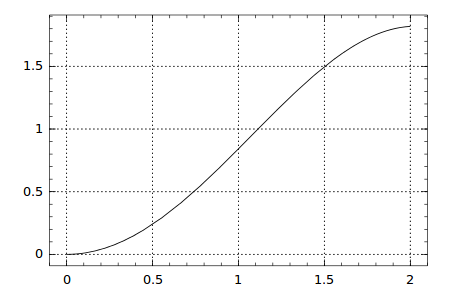

In [154]:
using Winston

Winston.plot(x -> sin(x)*x,0,2)
Winston.grid()

In [97]:
fnum1(x) = sin(x)*x

fnum1 (generic function with 1 method)

In [157]:
quadgk(fnum1,0.5,2)

(1.70095684226095,4.440892098500626e-16)

Utilizando uma função anônima

In [158]:
quadgk(x->sin(x)*x,0.5,2)

(1.70095684226095,4.440892098500626e-16)

#### USANDO O PACOTE CUBATURE 

Sintaxe:
```julia
[valor,erro] = hquadrature(funcao, xmin, xmax , reltol=1e-8, abstol=0, maxevals=0)
```
* ** Funcao**: função de uma variável
* ** xmin,xmax**: intervalos de integração
* ** reltol**:tolerância do erro relativo
* ** abstol**:tolerância do erro absoluto
* ** maxevals**:número máximo de avaliações da função

O comando hquadrature retorna o valor da integral e o erro (quanto menor, mais preciso é o calculo)

In [100]:
using Cubature

In [101]:
fnum2(x) = sin(x)*x

fnum2 (generic function with 1 method)

In [159]:
hquadrature(fnum2,0.5,2)

(1.70095684226095,1.888441450171807e-14)

** Utilizando uma função anônima**

In [160]:
hquadrature(x->sin(x)*x,0.5,2)

(1.70095684226095,1.888441450171807e-14)

#### FUNÇÃO GENÉRICA "SOMA DE RIEMANN" DE VÁRIOS METODOS DE INTEGRAÇÃO NUMÉRICA

Em 1854 Riemann foi o primeiro a dar uma definição rigorosa do integral de uma função contínua em um intervalo fechado. A soma de Riemann é um dos métodos mais simples de compreender as aproximações para a área sob uma curva. A ideia básica é que o intervalo [a,b] é particionado através de pontos a = $x_0 <x_1 < ... x_n = b$ e a área sob f(x) entre $ x_{i}\, $ e $ x_{i + 1} \, $ é aproximado por um retângulo com o f base de $x_{i+1} - x_i\, $ e altura dada por $f(x_i^*)\, $, onde $x_i^*$  é algum ponto no intervalo $[x_i, x_{i + 1}] $. Opções típicas são o ponto de  esquerda ou o ponto de direita do intervalo, ou o valor $x$ que minimiza ou maximiza a função $f(x)$ sobre o intervalo. A figura mostra estas quatro opções para alguma função amostra.
![](soma_riemann.gif)
Sintaxe:
```julia
riemann(funcao, a, b, n; metodo = "nome_metodo")
```
* **funcao**: Função
* ** a,b**:     Intervalos
* ** n**:       Quantidade de subintervalos
* **metodo**: Nome do método que será utilizado. "Direita" é o padrao.

In [104]:
function riemann(f, a, b, n; metodo = "direita")
  if metodo == "direita"
     met(f,l,r) = f(r) * (r-l)
        
  elseif metodo == "esquerda"
     met(f,l,r) = f(l) * (r-l)
        
  elseif metodo == "trapez"
     met(f,l,r) = (1/2) * (f(l) + f(r)) * (r-l)
        
  elseif metodo == "simp"
     met(f,l,r) = (1/6) * (f(l) + 4*(f((l+r)/2)) + f(r)) * (r-l)
  end

  xs = a + (0:n) * (b-a)/n
    
  as = [met(f, l, r) for (l,r) in zip(xs[1:end-1], xs[2:end])]
    
  sum(as)
end

riemann (generic function with 1 method)

In [105]:
f(x) =  sin(x)*x

f (generic function with 1 method)

In [106]:
riemann(f, 0, 1, 10000)

0.30121075364044186

In [107]:
riemann(f, 0, 1, 10000, metodo = "esquerda")

0.3011266065419611

In [108]:
riemann(f, 0, 1, 10000, metodo = "trapez")

0.30116868009120146

In [109]:
riemann(f, 0, 1, 10000, metodo = "simp")

0.3011686789397237

+ ### INTEGRAL IMPRÓPRIA###

In [110]:
using SymPy

@vars x

(x,)

In [111]:
fimp = 1/(1+x^2)

  1   
──────
 2    
x  + 1

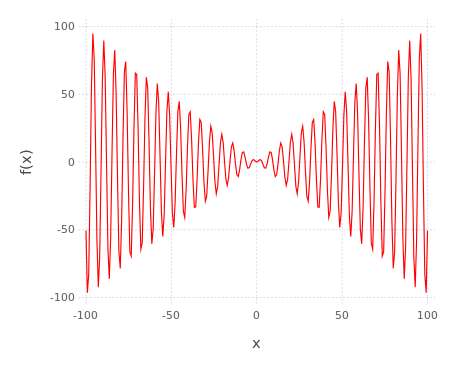

In [112]:
using Gadfly

set_default_plot_size(12cm, 10cm)

Gadfly.plot(
[x->f(x)], -100, 100,
Theme(default_color=colorant"red"),
Scale.x_continuous(minvalue=-100, maxvalue=100),
Scale.y_continuous(minvalue=0, maxvalue=1)
)

In [113]:
SymPy.integrate(fimp,x,0,+oo)

π
─
2

In [114]:
SymPy.integrate(fimp,x,-oo,+oo)

π

+ ### INTEGRAÇÃO IMPRÓPRIA NUMÉRICA

Para realizar uma integração numérica imprópria, utilize valores muito grandes para infinito($10^20$ ou mais) e valores muito pequenos para 0 ($10^{-10}$ ou menos)

#### COMANDO QUADGK

QUADGK utiliza a técnica de integração Gauss-Kronrod: a integral em cada intervalo é calculado usando uma regra de Kronrod (2*de ordem + 1 pontos) e o erro é estimado usando uma regra de Gauss incorporado (pontos de ordem). O intervalo com o maior erro é então subdividido em dois intervalos e o processo é repetido até que a tolerância de erro desejado seja alcançado. O resultado é um vetor na forma [valor, erro]. Sintaxe:
```julia
[valor_integral,erro] = quadgk(funcao, a,b,reltol=sqrt(eps), abstol=0, maxevals=10^7, order=7)
```
* ** funcao**: função de uma variável
* ** a,b**: intervalos de integração
* ** reltol**: tolerância do erro relativo
* ** abstol**: tolerância do erro absoluto
* ** maxevals**:número máximo de avaliações da função
* ** order**: ordem da regra de integração (o padrão é 7).

obs: Use **quadgk(funcao ,a ,b )**. Se usar **quadgk( funcao(x), a, b )** sem o SymPy ocorre erro.

In [115]:
f(x) = 1/(1+x^2)

f (generic function with 1 method)

In [116]:
# valor e erro

quadgk(f,0,10^20)

(1.5707963267948963,1.1687668713390112e-10)

In [117]:
# somente o valor 

quadgk(f,0,10^20)[1]

1.5707963267948963

In [118]:
# de -inf a +inf. Valor e erro

quadgk(f,-10^20,10^20)

(1.5707963267948963,1.1687676253768624e-10)

#### USANDO O PACOTE CUBATURE 

Sintaxe:
```julia
[valor_integral,erro] = hquadrature(funcao, xmin, xmax, reltol=1e-8, abstol=0, maxevals=0)
```
* ** funcao**: função de uma variável
* ** xmin,xmax**: intervalos de integração
* ** reltol**:tolerância do erro relativo
* ** abstol**:tolerância do erro absoluto
* ** maxevals**:número máximo de avaliações da função

O resultado é um vetor contendo o valor da integral e erro(quanto menor melhor a precisão do valor). A função utilizada pelo comando hcubature possui a seguinte sintaxe:
```julia
funcao = expressao_x[1]
x[1] -> corresponde a variável "x"
```

In [119]:
fiin(x) = 1/(1+x[1]^2)

fiin (generic function with 1 method)

In [120]:
# valor e erro

hquadrature(fiin,0,10^20)

(1.5707963267948963,9.142896763664417e-12)

In [121]:
# somente valor

hquadrature(fiin,0,10^20)[1]

1.5707963267948963

In [122]:
# de -inf a +inf. Valor e erro

hquadrature(fiin,-10^20,10^20)

(1.5707963267948963,9.143063377820794e-12)

+ ### INTEGRAÇÃO MULTIPLA 

** Integral Multipla Simbólica Indefinida **

In [123]:
using SymPy

@vars x y

(x,y)

** Integral Dupla Indefinida **

In [124]:
f_di = x*y-x+y;
f_di

x⋅y - x + y

$$ \int \int {f(x,y)} ~dxdy $$

In [125]:
int_dupla = SymPy.integrate(SymPy.integrate(f_di,x),y)

   2        ⎛ 2    ⎞
  x ⋅y    2 ⎜x    x⎟
- ──── + y ⋅⎜── + ─⎟
   2        ⎝4    2⎠

Ou colocando direto a função no comando

In [126]:
int_dupla = SymPy.integrate(SymPy.integrate(x*y-x+y,y),x)

   ⎛ 2    ⎞      2
 2 ⎜y    y⎟   x⋅y 
x ⋅⎜── - ─⎟ + ────
   ⎝4    2⎠    2  

Ou ainda mais facil

In [127]:
SymPy.integrate(f_di, (x), (y))

   2        ⎛ 2    ⎞
  x ⋅y    2 ⎜x    x⎟
- ──── + y ⋅⎜── + ─⎟
   2        ⎝4    2⎠

** Integral Tripla Indefinida **

In [128]:
using SymPy;

@vars x y z

(x,y,z)

In [129]:
f_ti = x*y*z-x+y-z;
f_ti

x⋅y⋅z - x + y - z

$$ \int \int \int {f(x,y)} ~dxdydz $$

In [130]:
int_tripla_a = SymPy.integrate(SymPy.integrate(SymPy.integrate(f_ti,x),y),z)

   ⎛ 2  2      ⎞     ⎛   2        2⎞
 2 ⎜x ⋅y    x⋅y⎟     ⎜  x ⋅y   x⋅y ⎟
z ⋅⎜───── - ───⎟ + z⋅⎜- ──── + ────⎟
   ⎝  8      2 ⎠     ⎝   2      2  ⎠

In [131]:
# simplificando o resultado

SymPy.simplify(int_tripla_a)

x⋅y⋅z⋅(-4⋅x + 4⋅y + z⋅(x⋅y - 4))
────────────────────────────────
               8                

Oura forma mais fácil

In [132]:
int_tripla_b = SymPy.integrate(f_ti, (x), (y), (z))

   2 ⎛y⋅z   1⎞                2 ⎛y⋅z   1⎞            
- y ⋅⎜─── - ─⎟ - y⋅(y - z) + z ⋅⎜─── - ─⎟ + z⋅(y - z)
     ⎝ 2    2⎠                  ⎝ 2    2⎠            

In [133]:
# simplificando o resultado

SymPy.simplify(int_tripla_b)

   3      2      3              2
  y ⋅z   y    y⋅z            3⋅z 
- ──── - ── + ──── + 2⋅y⋅z - ────
   2     2     2              2  

#### INTEGRAL MÚLTIPLA SIMBÓLICA DEFINIDA

In [134]:
using SymPy;

@vars x y

(x,y)

** Integral Multipla Dupla Definida **

$$ \int_{y-1}^{y+1} \int_{x-1}^{x+1} {f(x,y)} ~dxdy $$

In [135]:
f_si = x*y-x+y;
f_si

x⋅y - x + y

In [136]:
int_dupla = SymPy.integrate(SymPy.integrate(f_si,x,x-1,x+1),y,y-1,y+1)

                                           2                  2
2⋅x⋅(y - 1) - 2⋅x⋅(y + 1) - (x + 1)⋅(y - 1)  + (x + 1)⋅(y + 1) 

Outro exemplo: 

$$ \int_{0}^{1} \int_{0}^{1} {f(x,y)} ~dxdy $$

In [137]:
int_dupla = SymPy.integrate(SymPy.integrate(f_si,x,0,1),y,0,1)

1/4

Ou ainda mais prático

In [138]:
SymPy.integrate(f_si, (x, 0, 1), (y, 0, 1))

1/4

** Integral Multipla Tripla Definida **

In [139]:
using SymPy

@vars x y z

(x,y,z)

In [140]:
f_td = x*y*z-x+y-z;
f_td

x⋅y⋅z - x + y - z

$$ \int_{0}^{1} \int_{y-1}^{y+1} \int_{x-1}^{x+1} {f(x,y)} ~dxdydz $$

In [141]:
int_tripla = SymPy.integrate(SymPy.integrate(SymPy.integrate(f_td,x,x-1,x+1),y,y-1,y+1),z,0,1)

2⋅x⋅y - 4⋅x + 4⋅y - 2

Ou ainda mais prático

In [142]:
SymPy.integrate(f_td, (x, x-1 , x+1 ), (y, y-1 , y+1 ),(z, 0, 1))

2⋅x⋅y - 4⋅x + 4⋅y - 2

Outro exemplo

In [143]:
f_td2 = x*y*z-x+y-z;
f_td2

x⋅y⋅z - x + y - z

$$\int_{0}^{1} \int_{0}^{1} \int_{{0}}^{{1}} f(x,y,z)\, dxdydzb$$

In [144]:
int_tripla = SymPy.integrate(SymPy.integrate(SymPy.integrate(f_td2,x,0,1),y,0,1),z,0,1);
float(int_tripla)

-0.375

Ou ainda mais prático

In [145]:
SymPy.integrate(f_td2, (x, 0, 1), (y, 0, 1),(z,0,1))

-3/8

+ ### INTEGRAL MULTIPLA NUMÉRICA###

$$\int_{y_{min}}^{y_{max}} \int_{x_{min}}^{x_{max}} f(x,y)\, dxdy$$

#### INTEGRAL MULTIPLA DUPLA NUMÉRICA

Vamos utilizar o pacote Cubature. Sintaxe:
```julia
[valor_integral, erro] = hcubature(funcao, [xmin,ymin], [xmax,ymax],reltol=1e-8, abstol=0, maxevals=0)

```
* ** funcao**: função de uma variável
* ** [xmin,ymin] e [xmax,ymax]**: infintervalos de integração para x[1] e x[2]
* ** reltol**:tolerância do erro relativo
* ** abstol**:tolerância do erro absoluto
* ** maxevals**:número máximo de avaliações da função

O resultado é um vetor contendo o valor da integral e erro(quanto menor melhor a precisão do valor). A função utilizada pelo comando hcubature possui a seguinte sintaxe:
```julia
funcao = expressao_x[1]_x[2]
x[1] -> corresponde a variável "x"
x[2] -> corresponde a variável "y"  e assim por diante
```

In [146]:
using Cubature

In [147]:
f_dn(x) = x[1]*x[2] - x[1] + x[2]

f_dn (generic function with 1 method)

$$\int_{0}^{1} \int_{0}^{1} xy - x + y\, dxdy$$

In [148]:
# valor e erro 

hcubature(f_dn, [0,0], [1,1])

(0.25,0.0)

In [149]:
# somente valor

hcubature(f_dn, [0,0], [1,1])[1]

0.25

#### INTEGRAL TRIPLA NUMÉRICA 

$$\int_{z_{min}}^{z_{max}} \int_{y_{min}}^{y_{max}} \int_{x_{min}}^{x_{max}} f(x,y,z)\, dxdydzb$$

Vamos utilizar o pacote Cubature. Sintaxe:
```julia
[valor_integral,erro]=hcubature(funcao,[xmin,ymin,zmin],[xmax,ymax,zmax],reltol=1e-8,abstol=0,maxevals=0)
```
* ** funcao**: função de uma variável
* ** [xmin,ymin,zmin] e [xmax,ymax,zmax]**: infintervalos de integração para x[1], x[2] e x[3]
* ** reltol**:tolerância do erro relativo
* ** abstol**:tolerância do erro absoluto
* ** maxevals**:número máximo de avaliações da função

O resultado é um vetor contendo o valor da integral e erro(quanto menor melhor a precisão do valor). A função utilizada pelo comando hcubature possui a seguinte sintaxe:
```julia
funcao = expressao_x[1]_x[2]_x[3]
x[1] -> corresponde a variável "x"
x[2] -> corresponde a variável "y" 
x[3] -> corresponde a variável "z"  e assim por diante
```

In [150]:
using Cubature

In [151]:
f_tn(x) = x[1]*x[2]*x[3] - x[1] + x[2] + x[3]

f_tn (generic function with 1 method)

In [152]:
# valor e erro

hcubature(f_tn, [0,0,0], [1,1,1]) 

(0.6249999999999999,1.1102230246251565e-16)

In [153]:
# somente valor 

hcubature(f_tn, [0,0,0], [1,1,1])[1]

0.6249999999999999

%%% Fim Calculo Diferencial e Integral %%%